# Mobile Price 데이터 EDA 및 머신러닝

## 컬럼 설명

| 컬럼명        | 설명                                                    |
|--------------|--------------------------------------------------------|
| battery_power| 배터리가 한 번에 저장할 수 있는 총 에너지(mAh)         |
| blue         | 블루투스 지원 여부                                     |
| clock_speed  | 마이크로프로세서가 명령어를 실행하는 속도              |
| dual_sim     | 듀얼 심 지원 여부                                      |
| fc           | 전면 카메라 메가 픽셀                                  |
| four_g       | 4G 유무                                               |
| int_memory   | 내부 메모리(기가바이트)                                |
| m_dep        | 이동 깊이(cm)                                          |
| mobile_wt    | 휴대폰 무게                                            |
| n_cores      | 프로세스 코어 수                                       |
| pc           | 기본 카메라 메가 픽셀                                  |
| px_height    | 픽셀 해상도 높이                                       |
| px_width     | 픽셀 해상도 너비                                       |
| ram          | 메가바이트 단위의 랜덤 액세스 메모리                   |
| sc_h         | 휴대폰 화면 높이(cm)                                   |
| sc_w         | 휴대폰 화면 너비(cm)                                   |
| talk_time    | 한 번의 배터리 충전으로 가장 오래 지속되는 시간        |
| three_g      | 3G 유무                                               |
| touch_screen | 터치스크린 유무                                        |
| wifi         | 와이파이 유무                                          |
| price_range  | 0(저비용), 1(중간비용), 2(고비용), 3(매우 고비용)의 값을 갖는 목표 변수 |


## 1. 데이터 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from termcolor import colored
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical

print(colored('\nAll libraries imported succesfully', 'green'))


All libraries imported succesfully


In [2]:
# train 데이터 불러오기
train = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Mobile Price/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# test 데이터 불러오기
test = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Mobile Price/test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
# train 데이터 기초통계 정보 시각화
train.describe().loc[['min', 'mean', '25%', '50%', '75%', 'max']].T.style.background_gradient(axis = 1)

,min,mean,25%,50%,75%,max
battery_power,501.000000,1238.518500,851.750000,1226.000000,1615.250000,1998.000000
blue,0.000000,0.495000,0.000000,0.000000,1.000000,1.000000
clock_speed,0.500000,1.522250,0.700000,1.500000,2.200000,3.000000
dual_sim,0.000000,0.509500,0.000000,1.000000,1.000000,1.000000
fc,0.000000,4.309500,1.000000,3.000000,7.000000,19.000000
four_g,0.000000,0.521500,0.000000,1.000000,1.000000,1.000000
int_memory,2.000000,32.046500,16.000000,32.000000,48.000000,64.000000
m_dep,0.100000,0.501750,0.200000,0.500000,0.800000,1.000000
mobile_wt,80.000000,140.249000,109.000000,141.000000,170.000000,200.000000
n_cores,1.000000,4.520500,3.000000,4.000000,7.000000,8.000000


In [5]:
# train 데이터 정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 2. 데이터 EDA 및 시각화

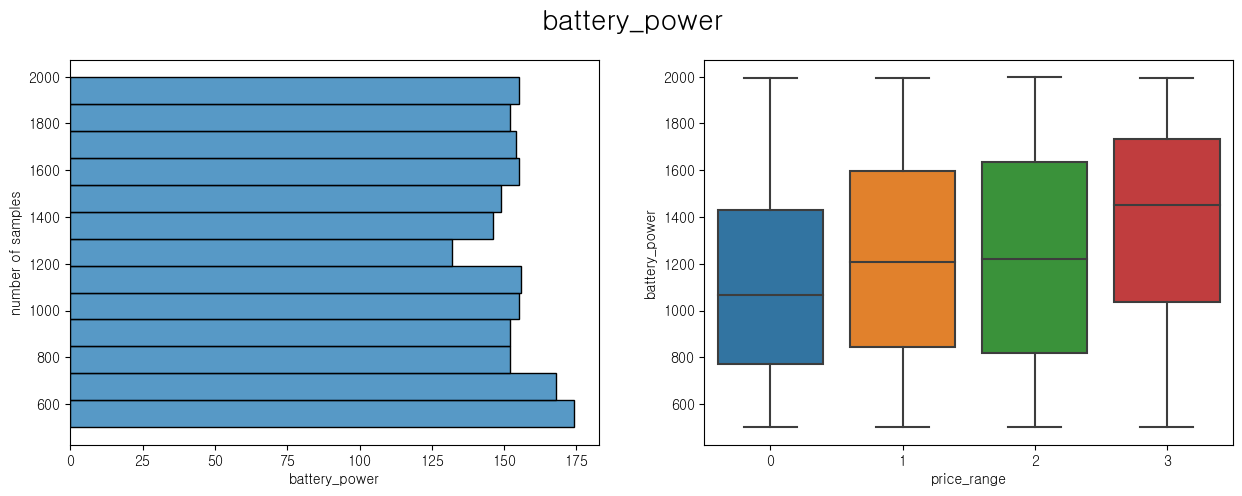

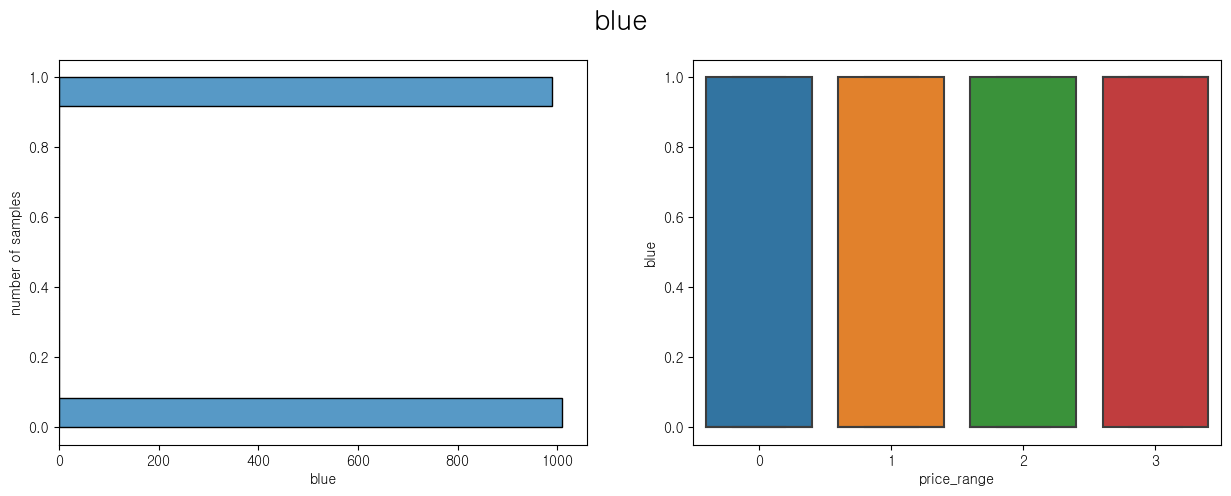

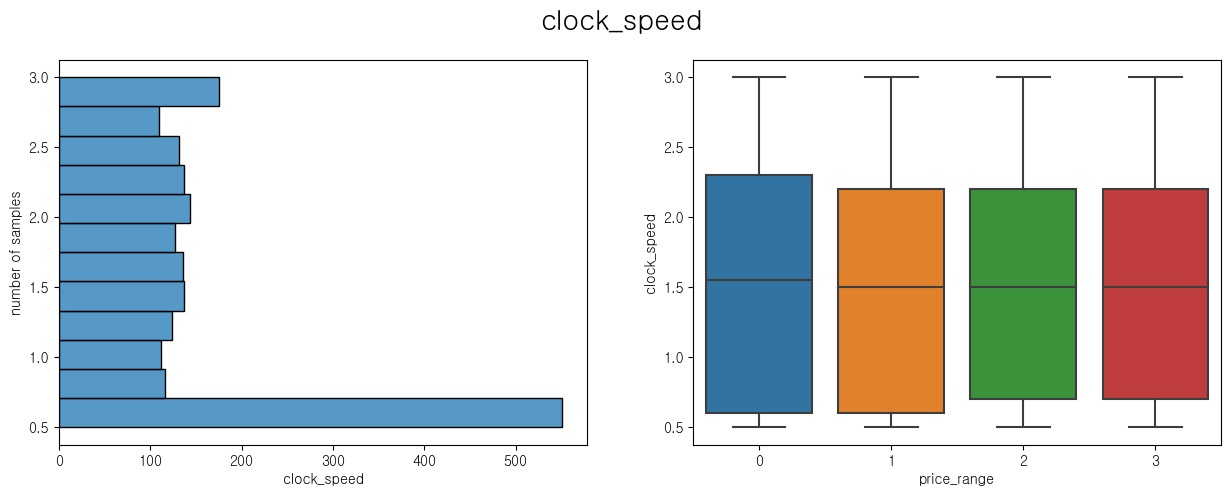

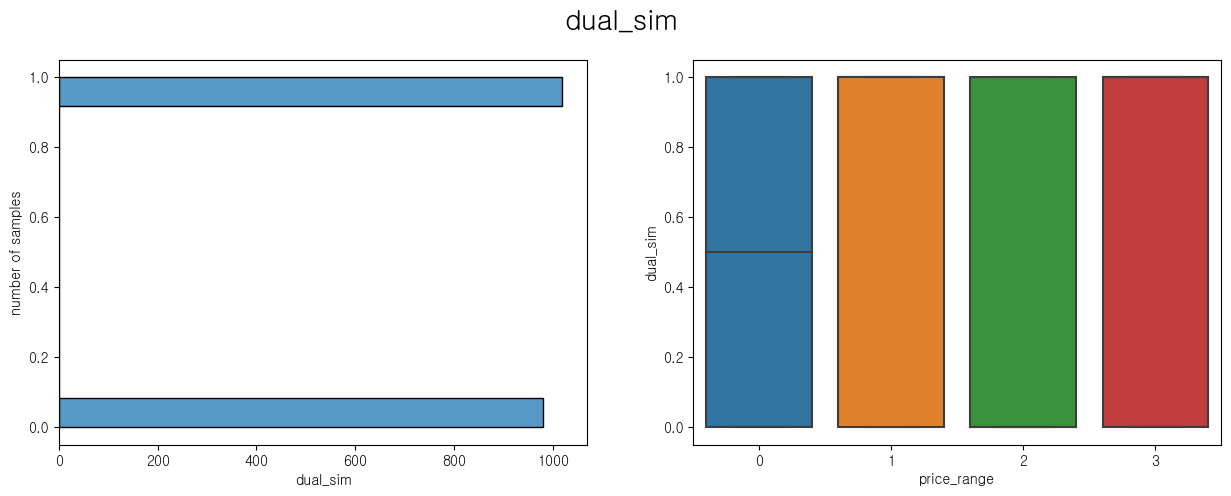

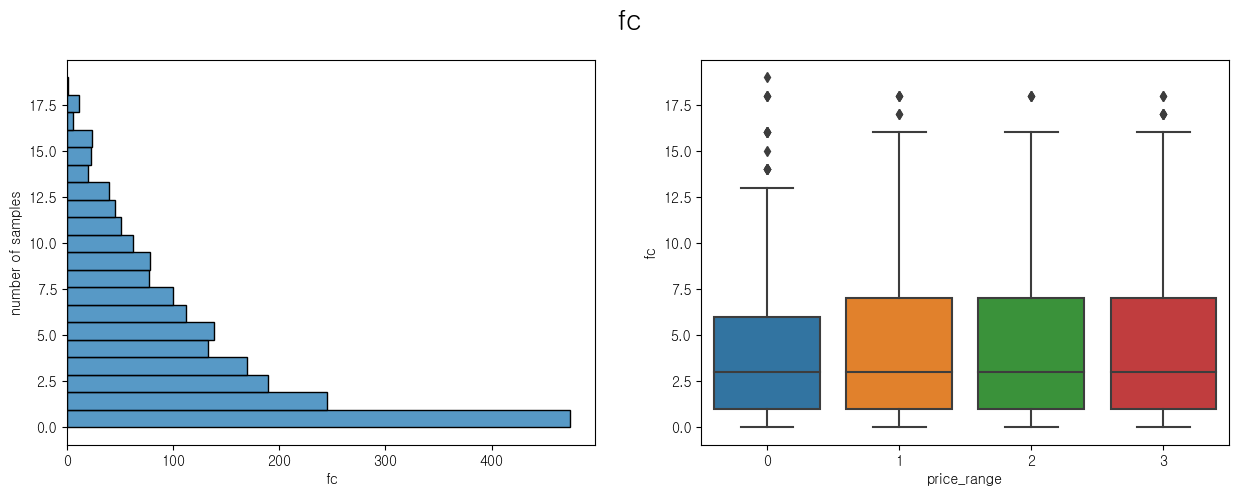

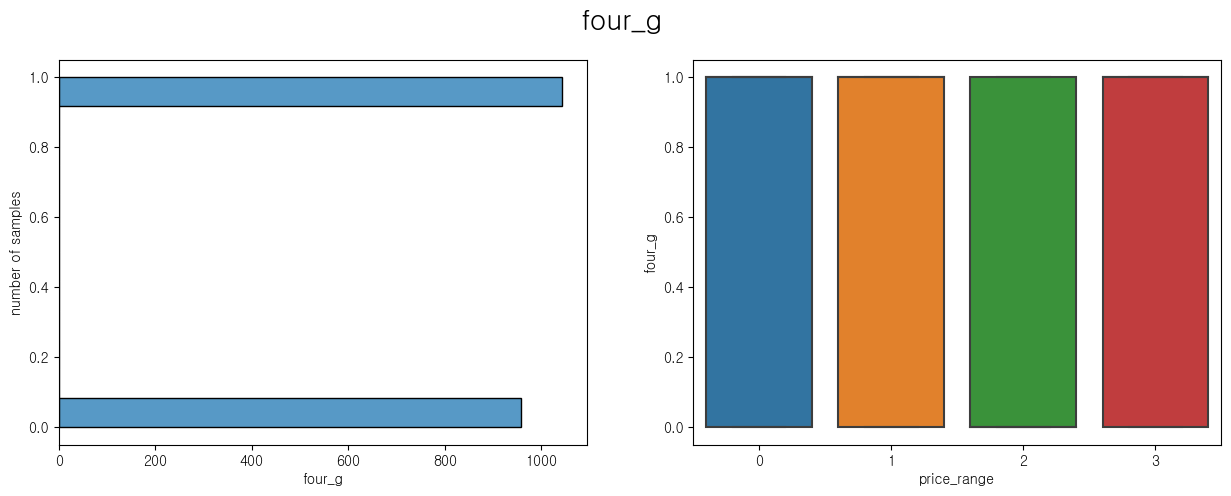

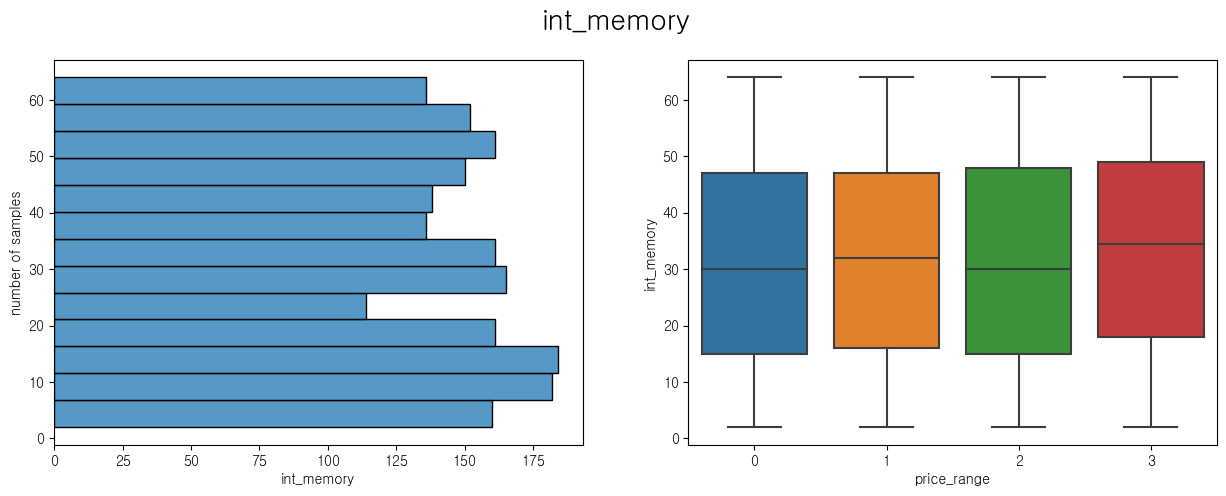

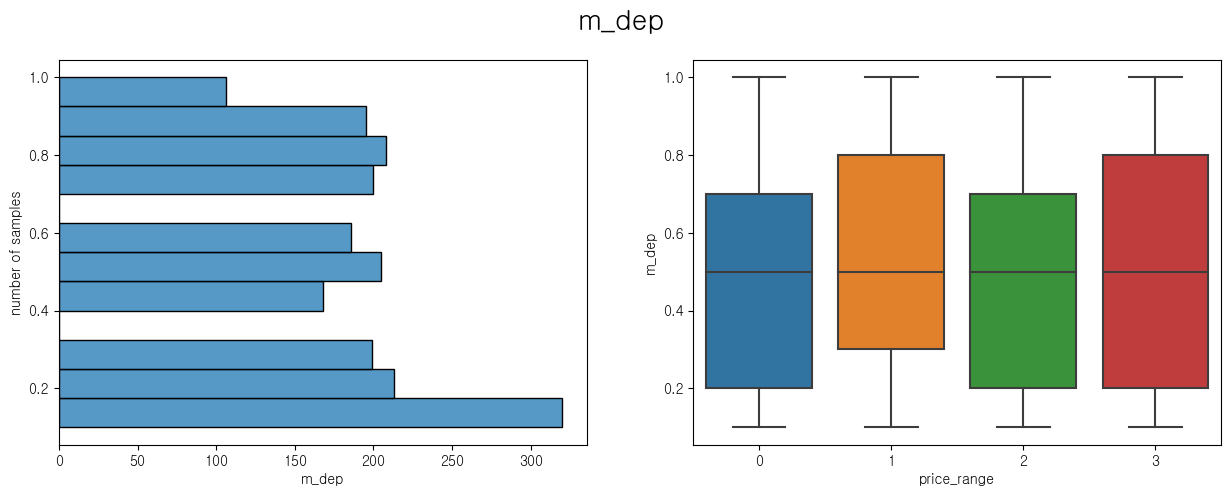

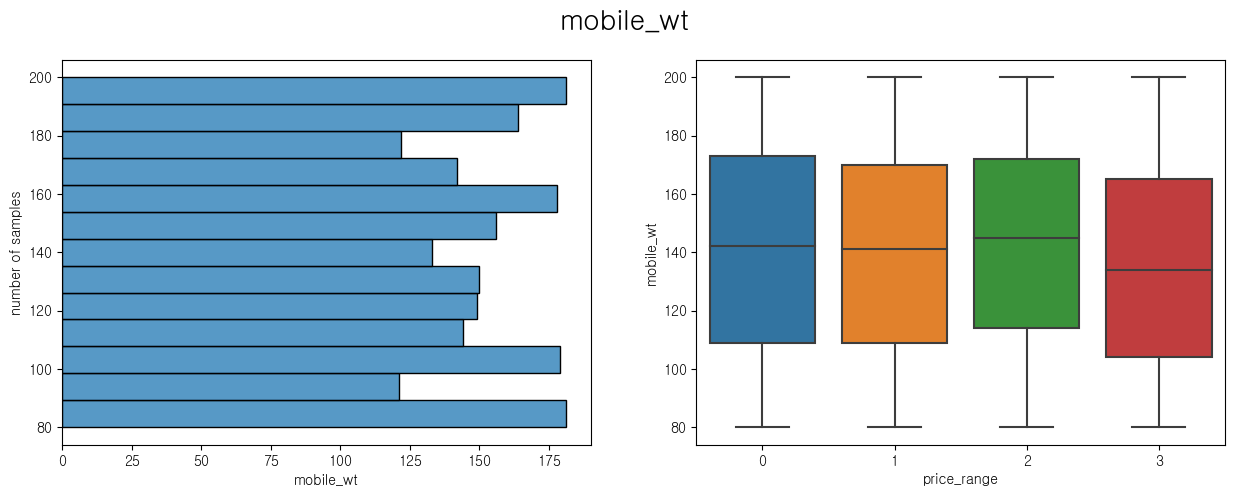

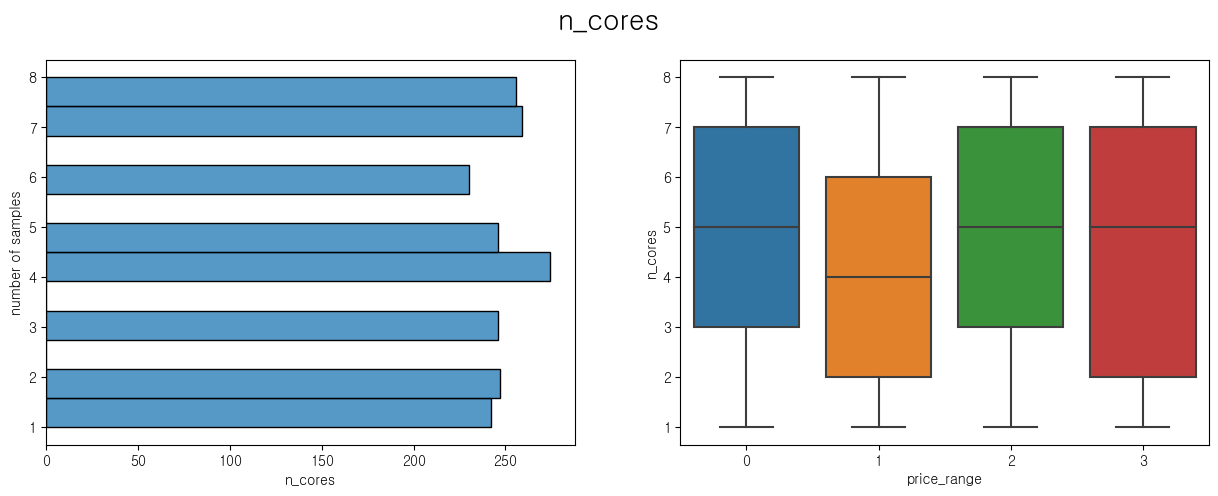

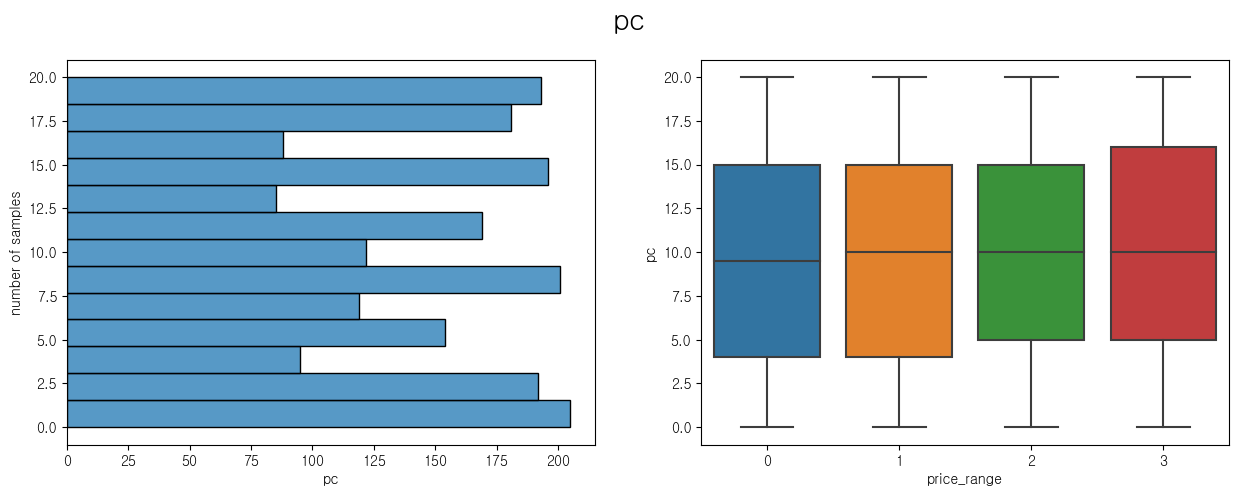

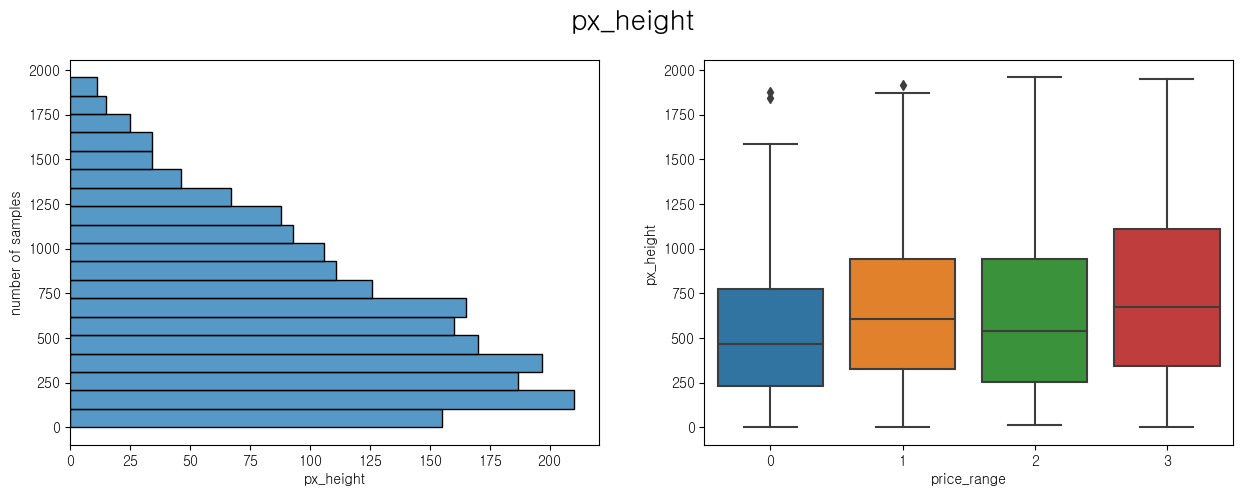

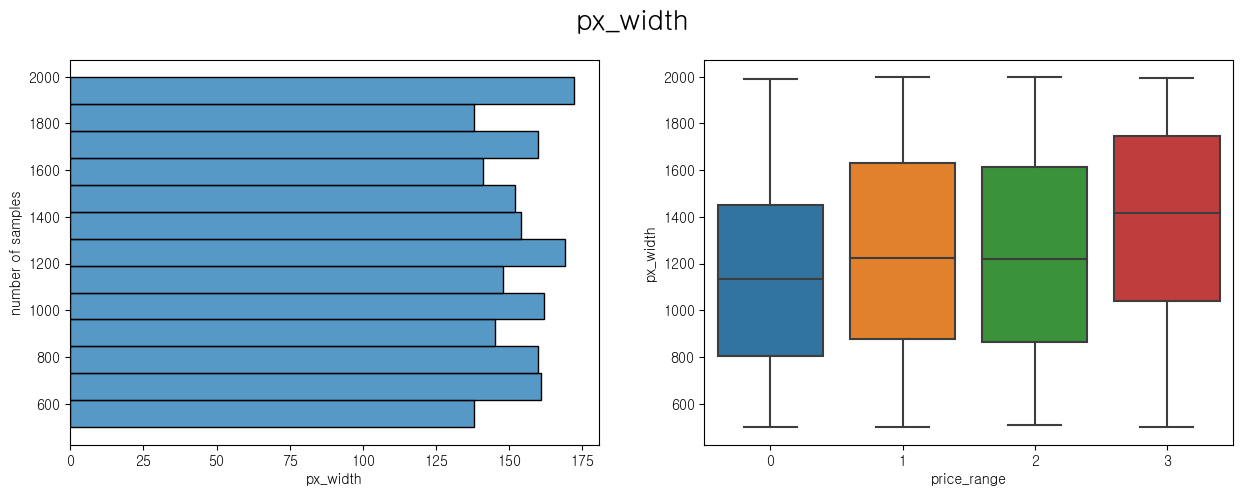

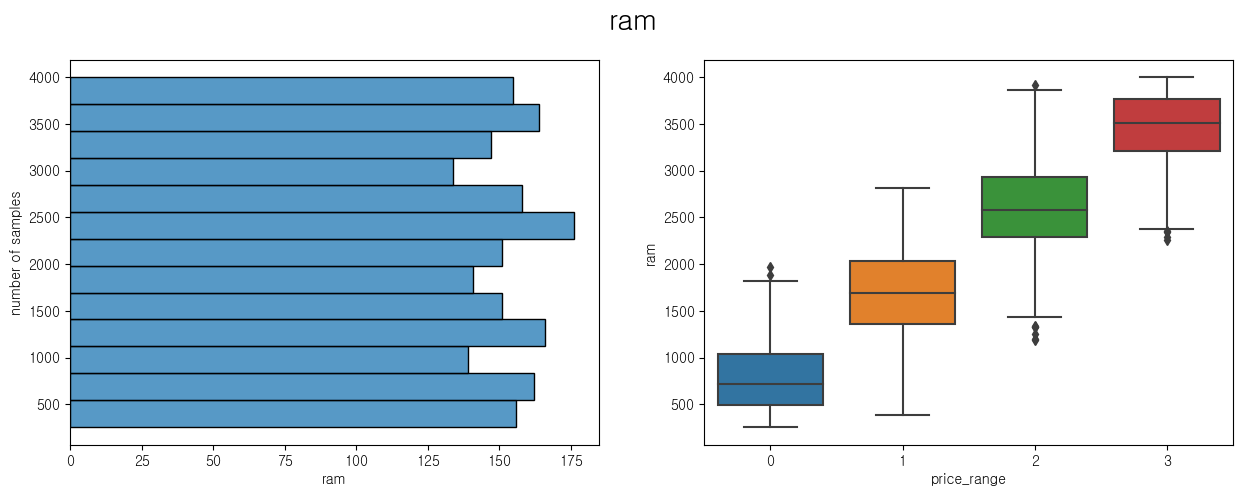

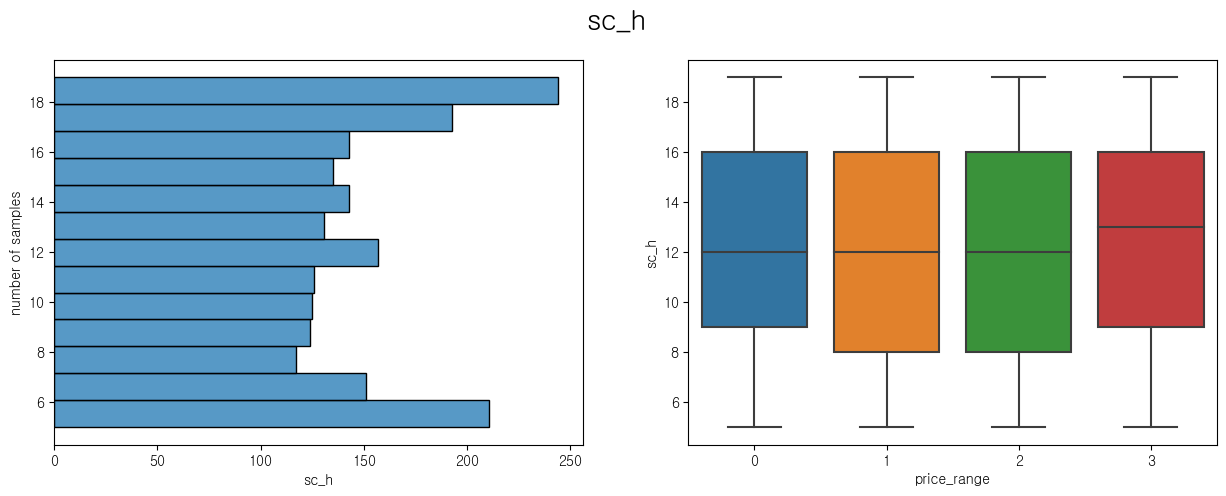

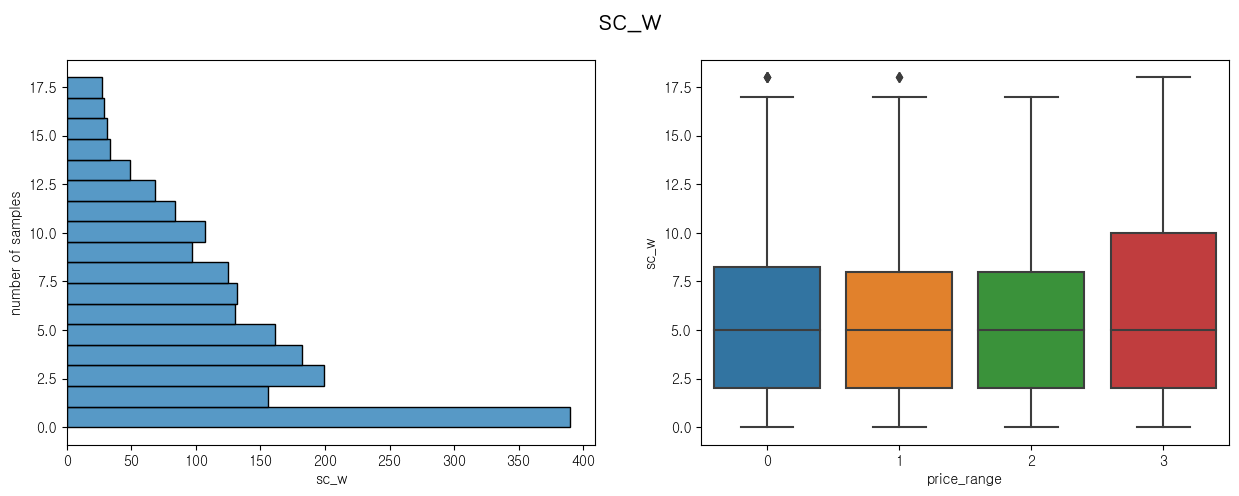

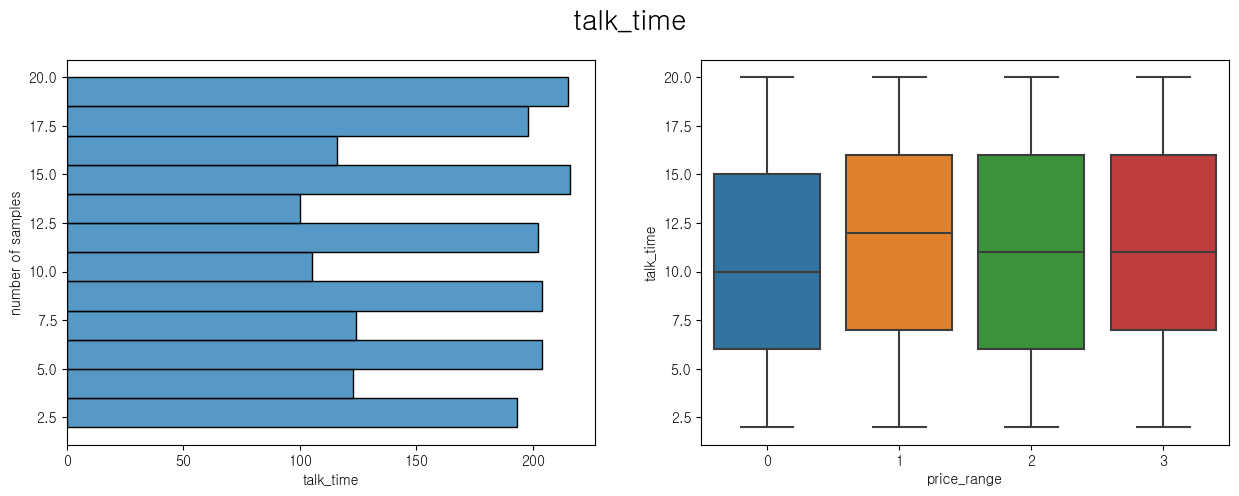

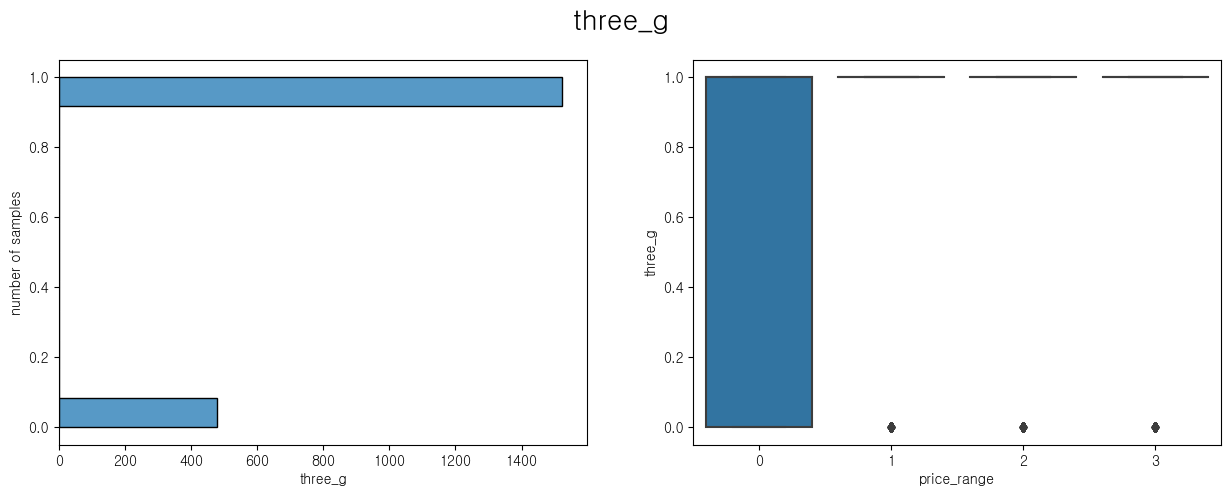

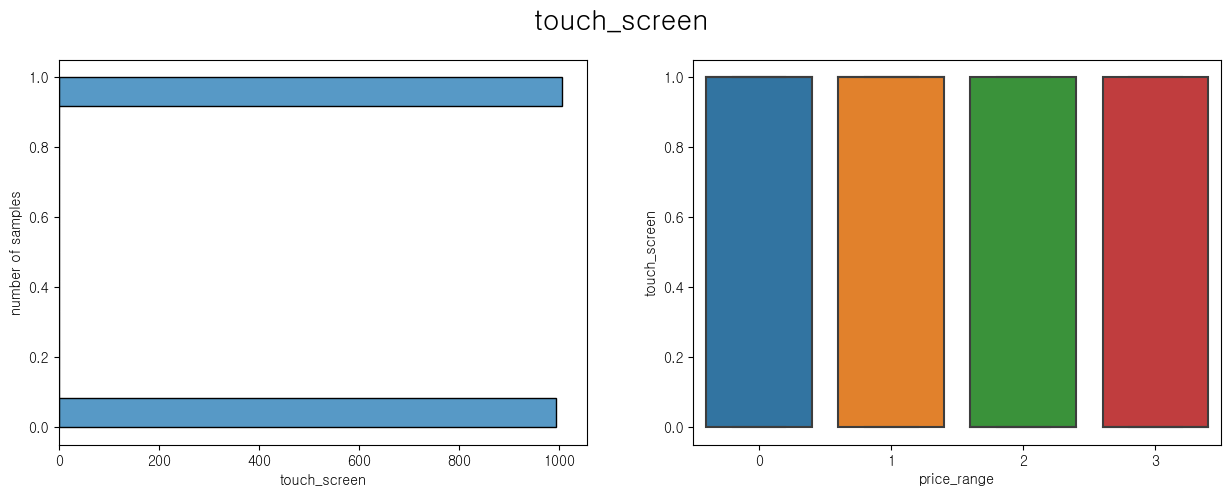

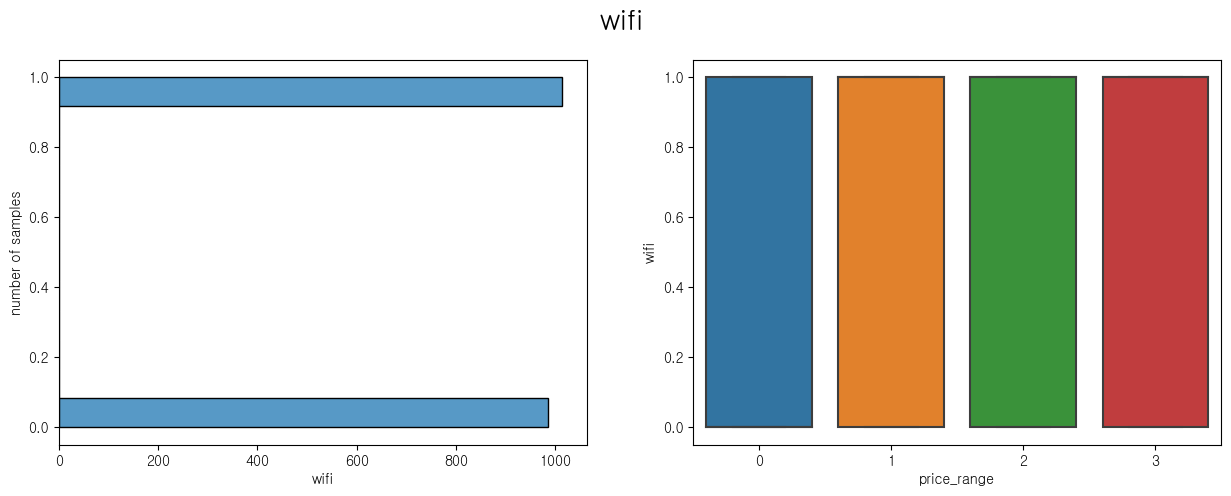

In [6]:
# 컬럼별 기초통계 시각화
# for 문 사용
for col in train.columns[: -1] :
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    plt.suptitle(col, fontsize = 20, fontweight = 'bold')
    # Left Ax
    ax0 = sns.histplot(y = col, data = train, ax = ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel = col, ylabel = 'number of samples')
    # Right Ax
    ax1 = sns.boxplot(x = 'price_range', y = col, data = train, ax = ax[1])

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


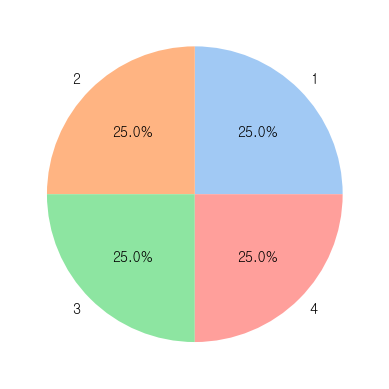

In [7]:
# price_range의 분포 파이차트
print(train.price_range.value_counts())

d = train[['price_range']]
d = d.groupby('price_range').size()
labels = ['1', '2', '3', '4']
# 파이차트 생성
sns.set_palette("pastel")
plt.pie(d, labels = labels, autopct = '%1.1f%%', shadow = False, )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

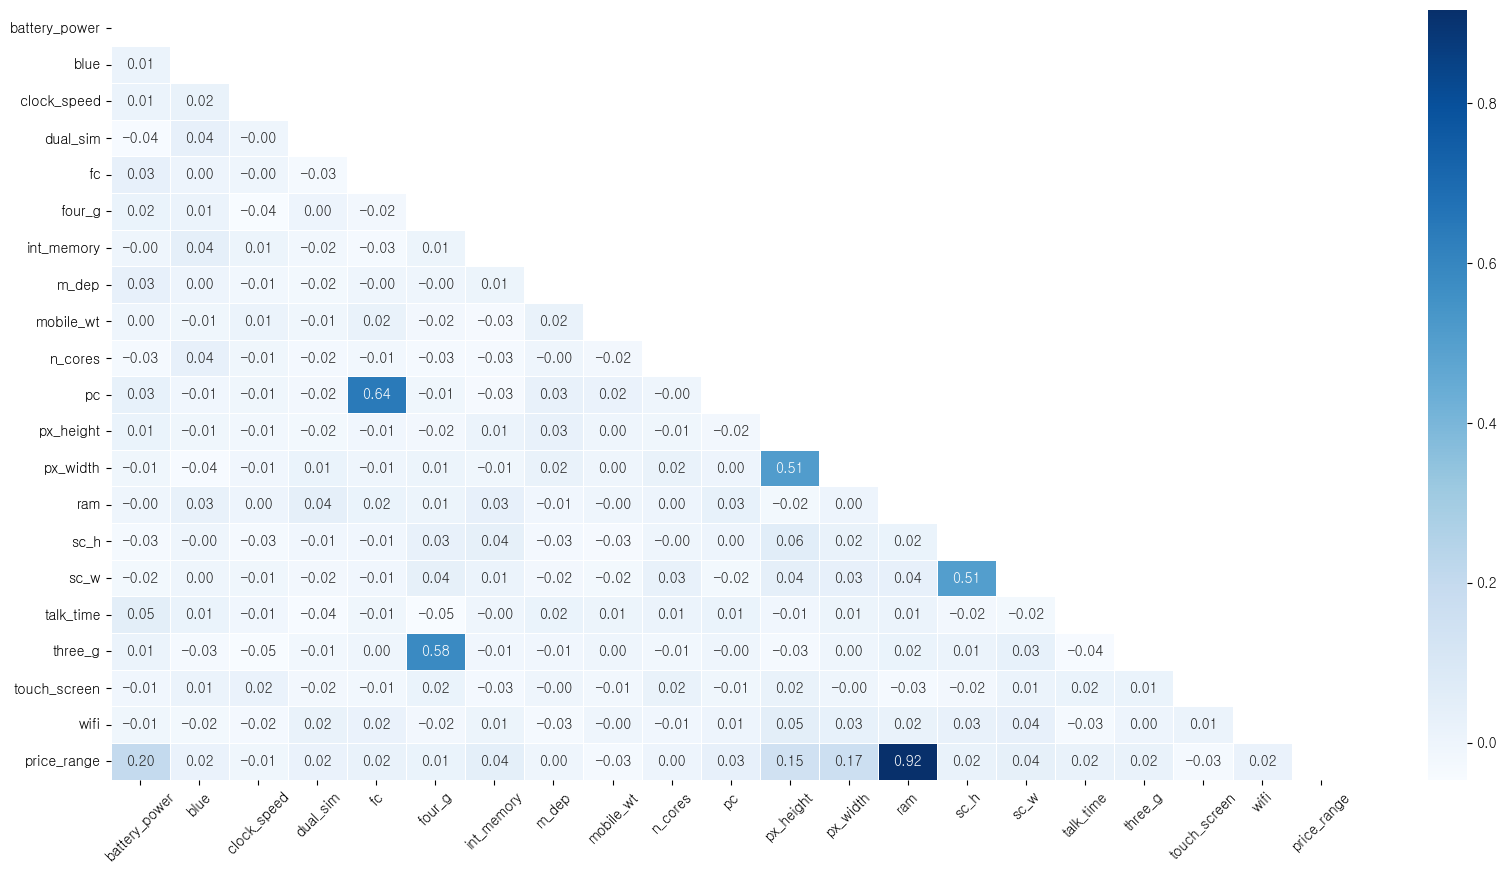

In [8]:
# 상관관계 히트맵
corr = train.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5, linecolor = 'white', mask = np.triu(corr), cmap = 'Blues')
plt.xticks(rotation = 45)
plt.show

* 상관관계 히트맵을 봤을 때, 가장 높은 관계로 보여지는 것은 0.92의 price_range와 ram간의 상관관계이다.

## 3. 머신러닝/딥러닝

### 3-1. 데이터 전처리

#### 열 구성

In [9]:
# Test에 불필요한 컬럼 제거
test.drop(columns = 'id', inplace = True)

In [10]:
y_train_full = train.price_range
train.drop(columns = 'price_range', inplace = True)

In [11]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

#### 정규화

In [12]:
columns = train.columns

# 정규화
scaler = StandardScaler()
Norm_train = scaler.fit_transform(train)
Norm_test = scaler.transform(test)

# 정규화 데이터프레임으로 전환
X_train_full = pd.DataFrame(Norm_train, columns = columns)
X_test = pd.DataFrame(Norm_test, columns = columns)

X_train_full.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis = 1)

,min,mean,std,max
battery_power,-1.678817,0.000000,1.000250,1.728812
blue,-0.990050,-0.000000,1.000250,1.010051
clock_speed,-1.253064,-0.000000,1.000250,1.811412
dual_sim,-1.019184,0.000000,1.000250,0.981177
fc,-0.992890,0.000000,1.000250,3.384628
four_g,-1.043966,0.000000,1.000250,0.957886
int_memory,-1.656260,-0.000000,1.000250,1.761380
m_dep,-1.393304,-0.000000,1.000250,1.727974
mobile_wt,-1.702391,0.000000,1.000250,1.688320
n_cores,-1.539175,-0.000000,1.000250,1.521249


#### 결측값

In [13]:
X_train_full.isna().sum().sum()

0

In [14]:
X_test.isna().sum().sum()

0

### 3-2. 모델링

In [15]:
# train, test 데이터 요약
y_train_full = to_categorical(y_train_full)

In [16]:
# 검증용 데이터셋 생성, testsize는 10%로 설정
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state = 0, test_size = 0.1)

In [17]:
# 출력
print(colored('### Variables Shape ###', 'blue'))
print('-' * 30)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('--------------------------')
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print('--------------------------')
print('X_test', X_test.shape)
print('y_test', X_test.shape[0])

### Variables Shape ###
------------------------------
X_train (1800, 20)
y_train (1800, 4)
--------------------------
X_val (200, 20)
y_val (200, 4)
--------------------------
X_test (1000, 20)
y_test 1000


In [18]:
# 4개 레이어로 뉴런 네트워크 모델 제작, activation='ELU'
model = models.Sequential()
model.add(layers.Dense(300, activation = 'ELU', input_shape = (20, )))
model.add(layers.Dense(200, activation = 'ELU'))
model.add(layers.Dense(100, activation = 'ELU'))
model.add(layers.Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['categorical_accuracy'])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
57/57 [==============================] - 1s 7ms/step - loss: 1.1811 - categorical_accuracy: 0.4856 - val_loss: 0.9705 - val_categorical_accuracy: 0.6500
Epoch 2/30
57/57 [==============================] - 0s 3ms/step - loss: 0.8855 - categorical_accuracy: 0.6572 - val_loss: 0.7739 - val_categorical_accuracy: 0.7150
Epoch 3/30
57/57 [==============================] - 0s 3ms/step - loss: 0.7345 - categorical_accuracy: 0.7156 - val_loss: 0.6609 - val_categorical_accuracy: 0.7950
Epoch 4/30
57/57 [==============================] - 0s 3ms/step - loss: 0.6350 - categorical_accuracy: 0.7794 - val_loss: 0.5791 - val_categorical_accuracy: 0.8200
Epoch 5/30
57/57 [==============================] - 0s 3ms/step - loss: 0.5598 - categorical_accuracy: 0.8294 - val_loss: 0.5149 - val_categorical_accuracy: 0.8750
Epoch 6/30
57/57 [==============================] - 0s 3ms/step - loss: 0.4994 - categorical_accuracy: 0.8706 - val_loss: 0.4629 - val_categorical_accuracy: 0.8900
Epoch 7/30
57/57

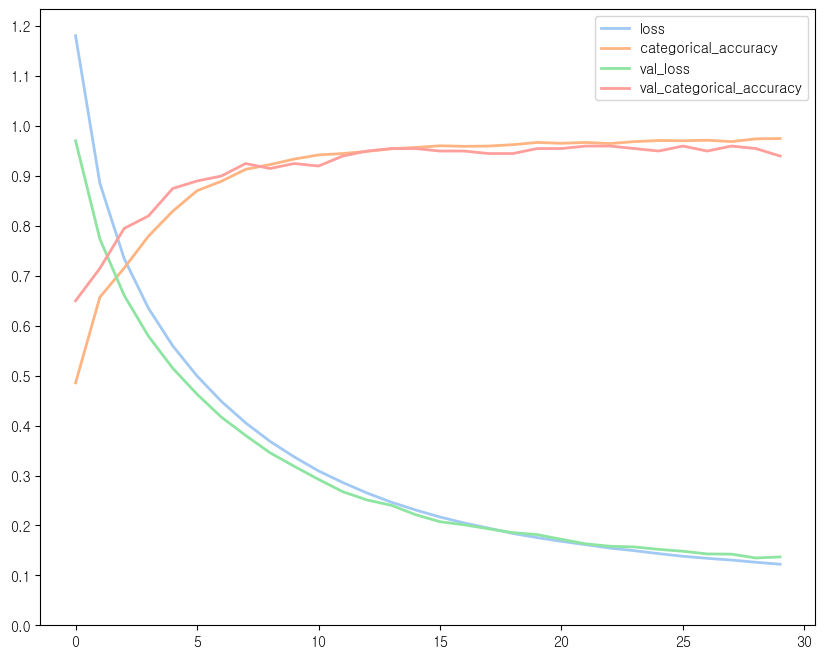

In [19]:
# 딥러닝 학습 결과 시각화
pd.DataFrame(history.history).plot(figsize = (10, 8), linewidth = 2)
plt.yticks(np.arange(0, 1.3, 0.1))
plt.show()

In [20]:
# y_pred은 각 표본에 대한 각 클래스의 확률을 말한다
y_prob = model.predict(X_test)
y_prob

32/32 [==============================] - 0s 1ms/step


array([[2.7024672e-13, 6.6160567e-07, 2.9145783e-01, 7.0854145e-01],
       [2.2309483e-17, 1.6577835e-09, 2.8721333e-02, 9.7127861e-01],
       [4.0599749e-11, 3.5184719e-05, 6.5207678e-01, 3.4788805e-01],
       ...,
       [6.0078388e-01, 3.9920238e-01, 1.3826582e-05, 2.5385951e-09],
       [2.6403893e-06, 1.5075776e-01, 8.4813899e-01, 1.1005548e-03],
       [4.3413837e-09, 2.0539309e-03, 9.9172872e-01, 6.2172725e-03]],
      dtype=float32)

In [21]:
# 각 표본에서 예측된 클래스
y_pred = np.argmax(y_prob, axis = 1)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,